In [19]:
# Imports and data loading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Load results CSV
df = pd.read_csv('simulation_results.csv')
df = df.sort_values('Toll Price (EUR)').reset_index(drop=True)
df

,Toll Price (EUR),EV Share,Total CO2 (kg),Grid Cost (EUR),Toll Revenue (EUR),Total Vehicles
0,0.0,0.315227,2988.422444,648.377926,0.0,2338
1,0.5,0.355432,2816.798046,722.403133,753.5,2338
2,1.0,0.386655,2693.777926,788.067977,1434.0,2338
3,1.5,0.435843,2544.380066,846.600431,1978.5,2338
4,2.0,0.481180,2299.378741,960.567666,2426.0,2338
5,2.5,0.530368,2095.935975,1062.405127,2745.0,2338
6,3.0,0.577844,1804.204221,1189.149182,2961.0,2338
7,3.5,0.606929,1731.175200,1220.406521,3216.5,2338
8,4.0,0.667237,1478.386774,1338.891788,3112.0,2338
9,4.5,0.700599,1321.287036,1407.431335,3150.0,2338


In [20]:
# Quick numeric summary of the main metrics
numeric_cols = ['Toll Price (EUR)', 'EV Share', 'Total CO2 (kg)', 'Grid Cost (EUR)', 'Toll Revenue (EUR)', 'Total Vehicles']
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Toll Price (EUR),11.0,2.500000,1.658312,0.000000,1.250000,2.500000,3.750000,5.000000
EV Share,11.0,0.527918,0.145877,0.315227,0.411249,0.530368,0.637083,0.749786
Total CO2 (kg),11.0,2084.724402,631.950230,1158.221994,1604.780987,2095.935975,2619.078996,2988.422444
Grid Cost (EUR),11.0,1060.282201,287.937051,648.377926,817.334204,1062.405127,1279.649154,1478.803123
Toll Revenue (EUR),11.0,2245.590909,1084.697189,0.000000,1706.250000,2745.000000,3036.500000,3216.500000
Total Vehicles,11.0,2338.000000,0.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000


## EV Share vs. Toll Price

First, inspect how the EV share responds to changes in the toll level. This comes directly from the EV-adoption function used during scenario generation.

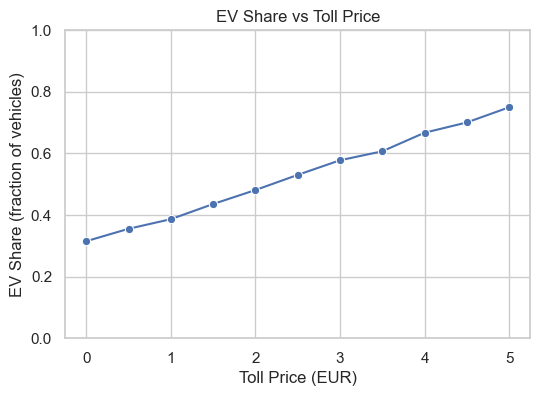

In [21]:
# EV share as a function of toll price
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Toll Price (EUR)', y='EV Share', marker='o')
plt.title('EV Share vs Toll Price')
plt.ylabel('EV Share (fraction of vehicles)')
plt.xlabel('Toll Price (EUR)')
plt.ylim(0, 1)
plt.show()

## CO₂ Emissions and Grid Cost vs. Toll Price

As the EV share increases, total tailpipe CO₂ should decrease, while electricity consumption (and therefore grid cost) should increase.

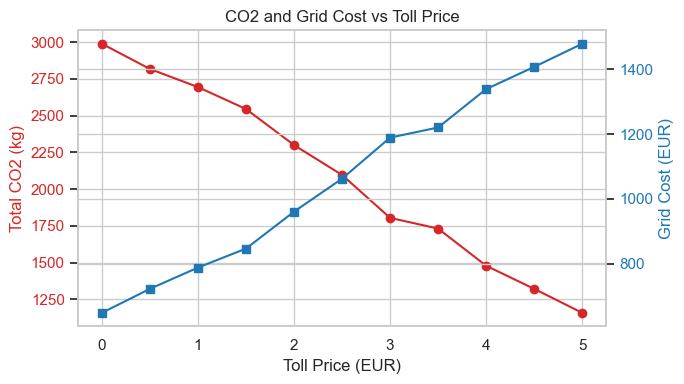

In [22]:
# CO2 and grid cost vs toll
fig, ax1 = plt.subplots(figsize=(7, 4))
color1 = 'tab:red'
color2 = 'tab:blue'

ax1.set_xlabel('Toll Price (EUR)')
ax1.set_ylabel('Total CO2 (kg)', color=color1)
ax1.plot(df['Toll Price (EUR)'], df['Total CO2 (kg)'], marker='o', color=color1, label='Total CO2 (kg)')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
ax2.set_ylabel('Grid Cost (EUR)', color=color2)
ax2.plot(df['Toll Price (EUR)'], df['Grid Cost (EUR)'], marker='s', color=color2, label='Grid Cost (EUR)')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('CO2 and Grid Cost vs Toll Price')
fig.tight_layout()
plt.show()

## Toll Revenue vs. Toll Price

Toll revenue depends on both the toll level and how many ICE vehicles remain in the system. As tolls increase, EV share rises, which can reduce the number of toll-paying ICE vehicles.

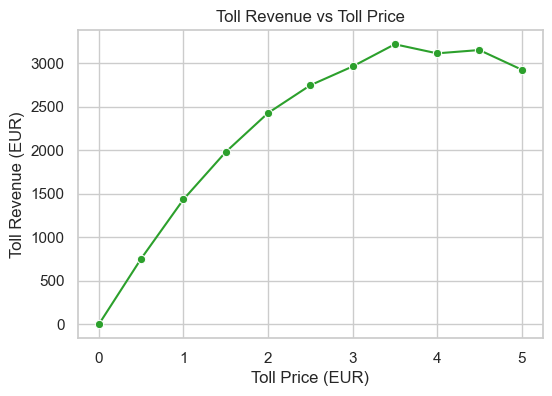

In [23]:
# Toll revenue vs toll price
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Toll Price (EUR)', y='Toll Revenue (EUR)', marker='o', color='tab:green')
plt.title('Toll Revenue vs Toll Price')
plt.ylabel('Toll Revenue (EUR)')
plt.xlabel('Toll Price (EUR)')
plt.show()

## Per-Vehicle Indicators and Trade-offs

To better understand efficiency, compute some per-vehicle and intensity metrics: CO₂ per vehicle, revenue per vehicle, and CO₂ per unit revenue. These help compare scenarios beyond raw totals.

In [24]:
# Compute additional indicators

df['CO2 per vehicle (kg/veh)'] = df['Total CO2 (kg)'] / df['Total Vehicles']

df['Revenue per vehicle (EUR/veh)'] = df['Toll Revenue (EUR)'] / df['Total Vehicles']

df['CO2 per revenue (kg/EUR)'] = df['Total CO2 (kg)'] / df['Toll Revenue (EUR)'].replace(0, pd.NA)



df[['Toll Price (EUR)', 'EV Share', 'CO2 per vehicle (kg/veh)', 'Revenue per vehicle (EUR/veh)', 'CO2 per revenue (kg/EUR)']]


,Toll Price (EUR),EV Share,CO2 per vehicle (kg/veh),Revenue per vehicle (EUR/veh),CO2 per revenue (kg/EUR)
0,0.0,0.315227,1.278196,0.000000,<NA>
1,0.5,0.355432,1.204790,0.322284,3.738285
2,1.0,0.386655,1.152172,0.613345,1.878506
3,1.5,0.435843,1.088272,0.846236,1.286015
4,2.0,0.481180,0.983481,1.037639,0.947807
5,2.5,0.530368,0.896465,1.174080,0.763547
6,3.0,0.577844,0.771687,1.266467,0.609323
7,3.5,0.606929,0.740451,1.375749,0.538217
8,4.0,0.667237,0.632330,1.331052,0.47506
9,4.5,0.700599,0.565136,1.347305,0.419456
